In [1]:
!pip install colour
!pip install numpy==1.16.0

In [2]:
## general imports
import json
import numpy as np

## COCO imports
from pycocotools_src.coco import COCO
from pycocotools_src.cocoeval import COCOeval
from pycocotools_src.cocoanalyze_src import COCOanalyze
import pycocotools_src.cocoanalyze_src
## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [3]:
## set paths
dataDir  = 'C:/Users/baris/Desktop/cv data/alphaTorch/AlphaPose/val2014out/coco-analyze/'
dataType = 'val2014'
annType  = 'person_keypoints'
teamName = 'fakekeypoints100'

annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
resFile  = 'C:/Users/baris/Desktop/cv data/alphaTorch/AlphaPose/val2014out/coco-analyze/alphapose-results-coco2014-val_trimmed_2.json'

print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

gt_data   = json.load(open(annFile,'rb'))
imgs_info = {i['id']:{'id':i['id'] ,
                      'width':i['width'],
                      'height':i['height']}
                       for i in gt_data['images']}

annFile:  [C:/Users/baris/Desktop/cv data/alphaTorch/AlphaPose/val2014out/coco-analyze//annotations/person_keypoints_val2014.json]
resFile:  [C:/Users/baris/Desktop/cv data/alphaTorch/AlphaPose/val2014out/coco-analyze/alphapose-results-coco2014-val_trimmed_2.json]


In [4]:
team_dts = json.load(open(resFile,'rb'))
team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

team_img_ids = set([d['image_id'] for d in team_dts])
print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO( annFile )

## initialize COCO detections api
coco_dt   = coco_gt.loadRes( team_dts )

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
if teamName == 'fakekeypoints100':
    imgIds  = sorted(coco_gt.getImgIds())[0:100]
    coco_analyze.cocoEval.params.imgIds = imgIds

Loaded [96279] instances in [40504] images.
loading annotations into memory...
Done (t=3.82s)
creating index...
index created!
Loading and preparing results...
DONE (t=2.74s)
creating index...
index created!


In [11]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.evaluate(verbose=True, makeplots=True, savedir="out")

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.18s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.00s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.929
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.928
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.928
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.897
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.858
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.842
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.789
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.720
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

In [12]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [13]:
# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.11s).
DONE (t=0.27s).
Analyzing detection scores...
<mrr:2.0>Running per image *optimal score* evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.12s).


AssertionError: 

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.03s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.00s).
Correcting area range [all]:
Correcting error type [miss]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.03s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.00s).
Correcting error type [swap]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.03s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.00s).
Correcting error type [inversion]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.03s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.00s).
Correcting error type [jitter]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=0.03s).
<mrr:2.0

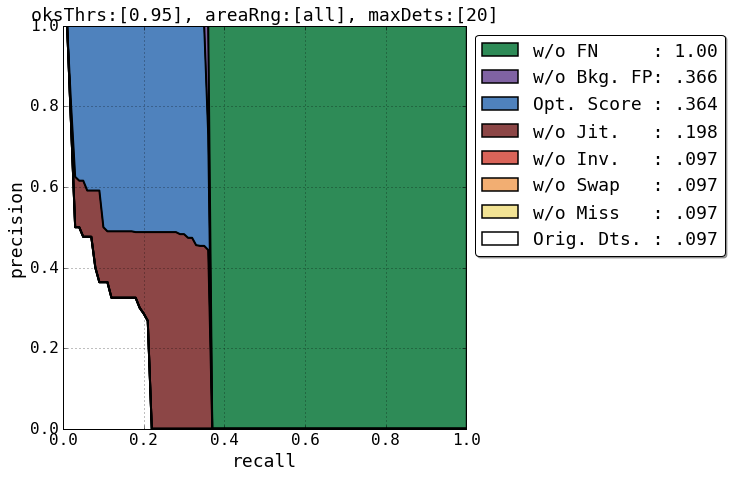

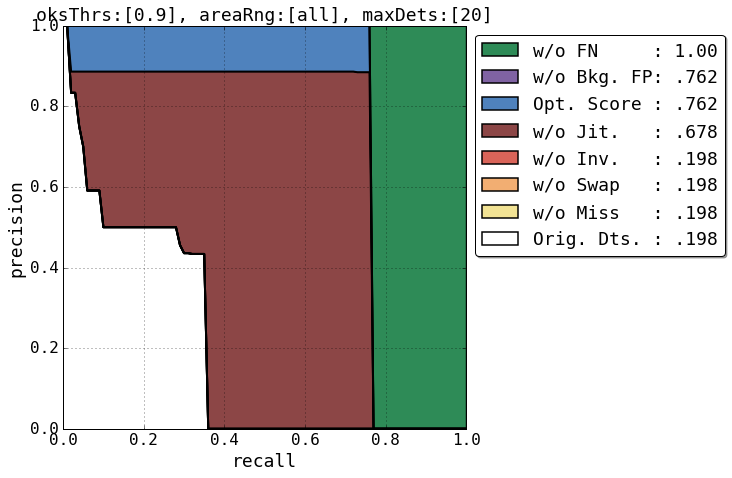

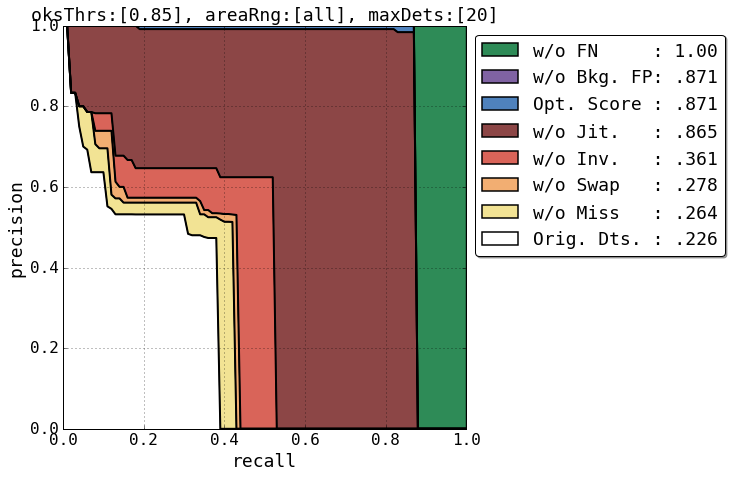

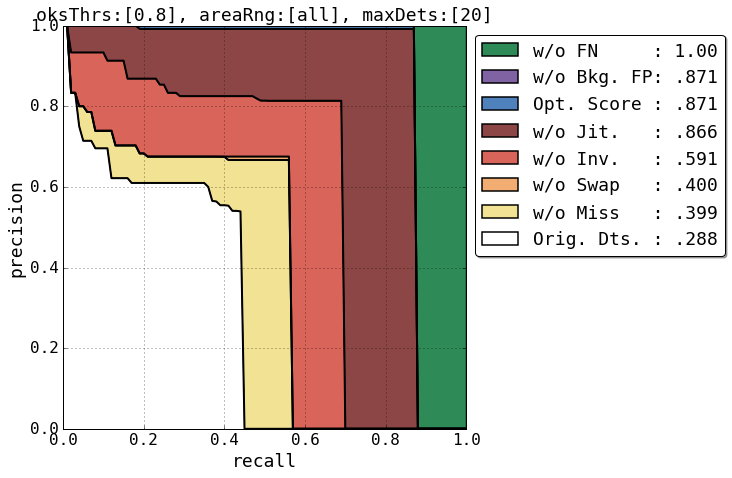

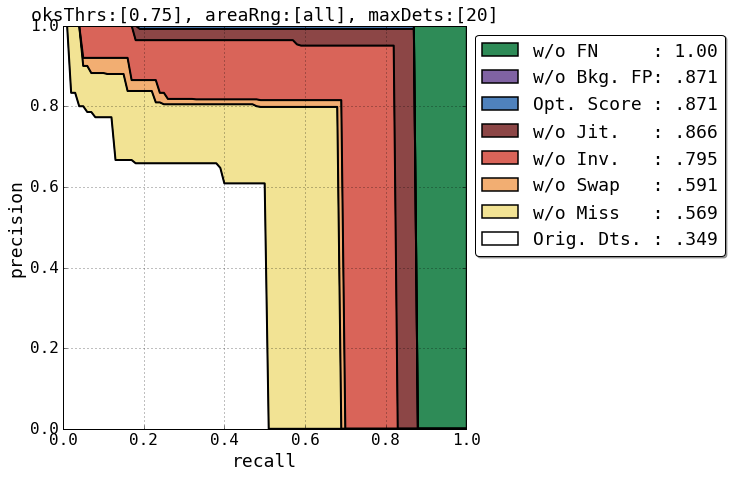

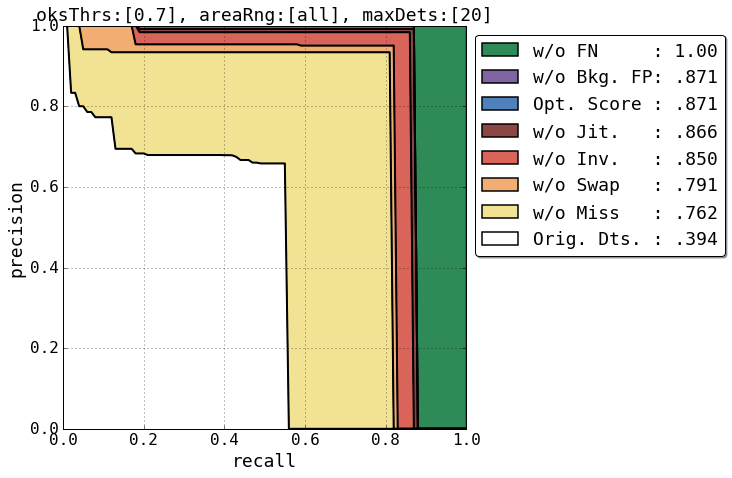

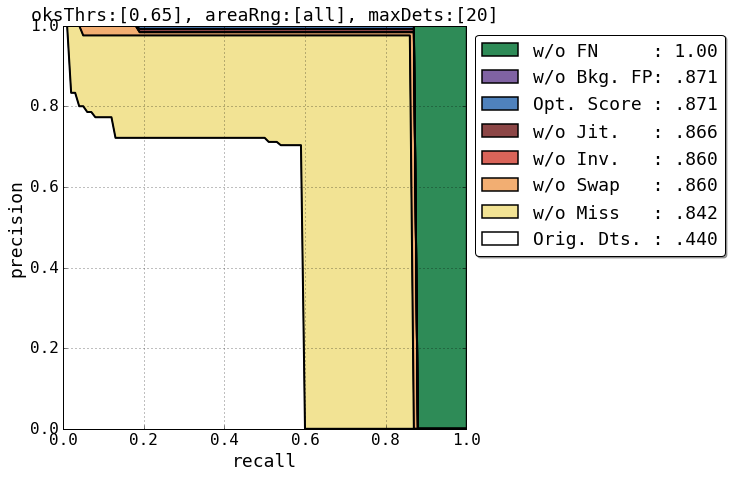

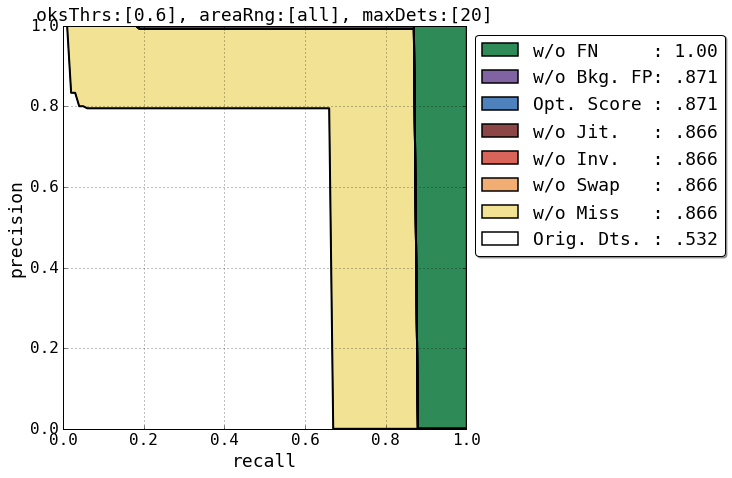

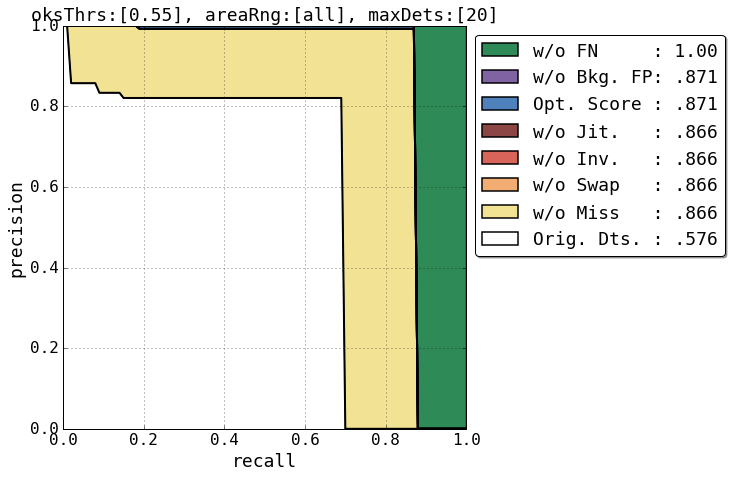

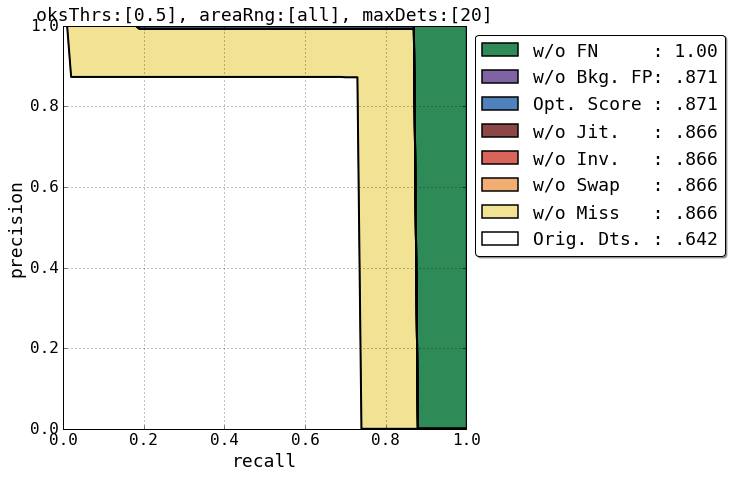

In [7]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [14]:
## print the performance summary 
for stat in coco_analyze.stats: 
    print(stat)

0.9288952172660901
0.9277470049368886
0.927613266072806
0.8968698404302962
0.8860672328178192
0.858029081111883
0.8421959099392591
0.789465415632248
0.719887012547561
0.3431737446043614
0.8119943725359212
0.7630096726753709
0.8659363829519758
0.9496402877697842
0.9424460431654677
0.9424460431654677
0.9136690647482014
0.9064748201438849
0.8776978417266187
0.8633093525179856
0.8057553956834532
0.7410071942446043
0.43884892086330934
0.8381294964028777
0.7945945945945946
0.8876923076923078


In [20]:
## after analyze() has been called the following variables are available

# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']

i = 17
# info on keypoint detection localization error
print ('good: '+ str(corrected_dts[i]['good'])) 
print ('miss: '+str(corrected_dts[i]['miss']))
print ('swap: '+str(corrected_dts[i]['swap']))
print ('inv.: '+str(corrected_dts[i]['inversion']))
print ('jit.: \n'+str(corrected_dts[i]['jitter']))

# corrected keypoint locations
print ('predicted keypoints:\n '+str(corrected_dts[i]['keypoints']))
print('corrected keypoints:\n '+str(corrected_dts[i]['opt_keypoints'])+'\n')

# optimal detection score
print ('original score: '+str(corrected_dts[i]['score']))
print ('optimal score: \n'+str(corrected_dts[i]['opt_score']))

good: [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]
miss: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
swap: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inv.: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
jit.: 
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predicted keypoints:
 [253.58494567871094, 333.63006591796875, 0.0067103407345712185, 251.6646728515625, 334.1101379394531, 0.009829748421907425, 258.7056884765625, 335.39031982421875, 0.005987955257296562, 252.1969451904297, 332.55816650390625, 0.8622800707817078, 259.0708312988281, 333.73443603515625, 0.6454100608825684, 245.8932342529297, 340.6886291503906, 0.7453914284706116, 260.6057434082031, 343.07904052734375, 0.7398825883865356, 238.86282348632812, 348.1921691894531, 0.6864141225814819, 262.49664306640625, 356.63482666015625, 0.7386820912361145, 241.42318725585938, 357.95355224609375, 0.0696549192070961, 262.72479248046875, 367.6953125, 0.7290440201759338, 244.6236572265625, 364.3544921875, 

KeyError: 'opt_score'

In [25]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print("Oks:['all'] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts[str(oks)]),len(false_neg_gts['all',str(oks)])))

KeyError: '0.5'